<a href="https://colab.research.google.com/github/KritikaSati/CustomerPersonalityAnalysis/blob/main/CustomerPersonalityAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***DATA PRE-PROCESSING STEP ***

Importing the libraries and the warnings 

In [146]:
#IMPORT THE LIBRARIES....
import numpy as np # linear algebra....
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)....
from matplotlib import pyplot as plt #Visualization of the data....
%matplotlib inline
import seaborn as sns
import matplotlib
from pylab import *
from datetime import date
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

importing the "marketing_campaign" dataset

In [147]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
main_df = pd.read_excel('gdrive/My Drive/marketing_campaign.xlsx')
main_df.head(3).style.background_gradient(cmap='Greys')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.000000,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.000000,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.000000,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0


Creating a copy of raw dataset

In [148]:
df = main_df.copy()
df.head(5).style.background_gradient(cmap='Greys')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.000000,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.000000,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.000000,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.000000,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.000000,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [149]:
#CHECK THE COLUMNS NAME
print("Columns in DataFrame is :\n",df.columns)

Columns in DataFrame is :
 Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [150]:
#PRINT THE COMPLETE INFORMATION OF THE DATASET.....
print("Print a Summary of a Dataframe is :",df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Memory Reduction:-

In general, columns having object datatype can take up a lot of memory space since they are storing strings taking more space than integers and floating points. So, to reduce this, we used memory reduction in our data analysis to prevent the unnecessary occurrence of Memory-Error in our model.

In [151]:
memory_usage = df.memory_usage(deep=True) / 1024 ** 2
print('memory usage of features: \n', memory_usage.head(7))
print('memory usage sum: ',memory_usage.sum())

memory usage of features: 
 Index             0.000122
ID                0.017090
Year_Birth        0.017090
Education         0.137827
Marital_Status    0.136875
Income            0.017090
Kidhome           0.017090
dtype: float64
memory usage sum:  0.8622875213623047


In [152]:
def reduce_memory_usage(df, verbose=True):
    numerics = ["int8", "int16", "int32", "int64", "float16", "float32", "float64"]
    start_mem = df.memory_usage().sum() / 1024 ** 2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if (
                    c_min > np.finfo(np.float16).min
                    and c_max < np.finfo(np.float16).max
                ):
                    df[col] = df[col].astype(np.float16)
                elif (
                    c_min > np.finfo(np.float32).min
                    and c_max < np.finfo(np.float32).max
                ):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024 ** 2
    if verbose:
        print(
            "Mem. usage decreased to {:.2f} Mb ({:.1f}% reduction)".format(
                end_mem, 100 * (start_mem - end_mem) / start_mem
            )
        )
    return df

df = reduce_memory_usage(df, verbose=True)

Mem. usage decreased to 0.13 Mb (73.7% reduction)


In [153]:
#LETS DO THE BASIC STATISTICS ON CONTINOUS FEATURES...
df.describe().style.background_gradient(cmap='Greys')

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.250000,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.000000,11.000000,0.149107
std,3246.662198,11.984069,25173.076172,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.000000,0.000000,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,11.000000,1.000000


Detecting the missing values:-

In [154]:
#PERCENTAGE OF THE MISSING VALUES - DATAFRAME..... 
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, Percentage], axis=1, keys=['Total', 'Percentage'])
missing_data(df).style.background_gradient(cmap='Greys')

,Total,Percentage
Income,24,1.071429
ID,0,0.000000
NumDealsPurchases,0,0.000000
Z_Revenue,0,0.000000
Z_CostContact,0,0.000000
Complain,0,0.000000
AcceptedCmp2,0,0.000000
AcceptedCmp1,0,0.000000
AcceptedCmp5,0,0.000000
AcceptedCmp4,0,0.000000


<Axes: >

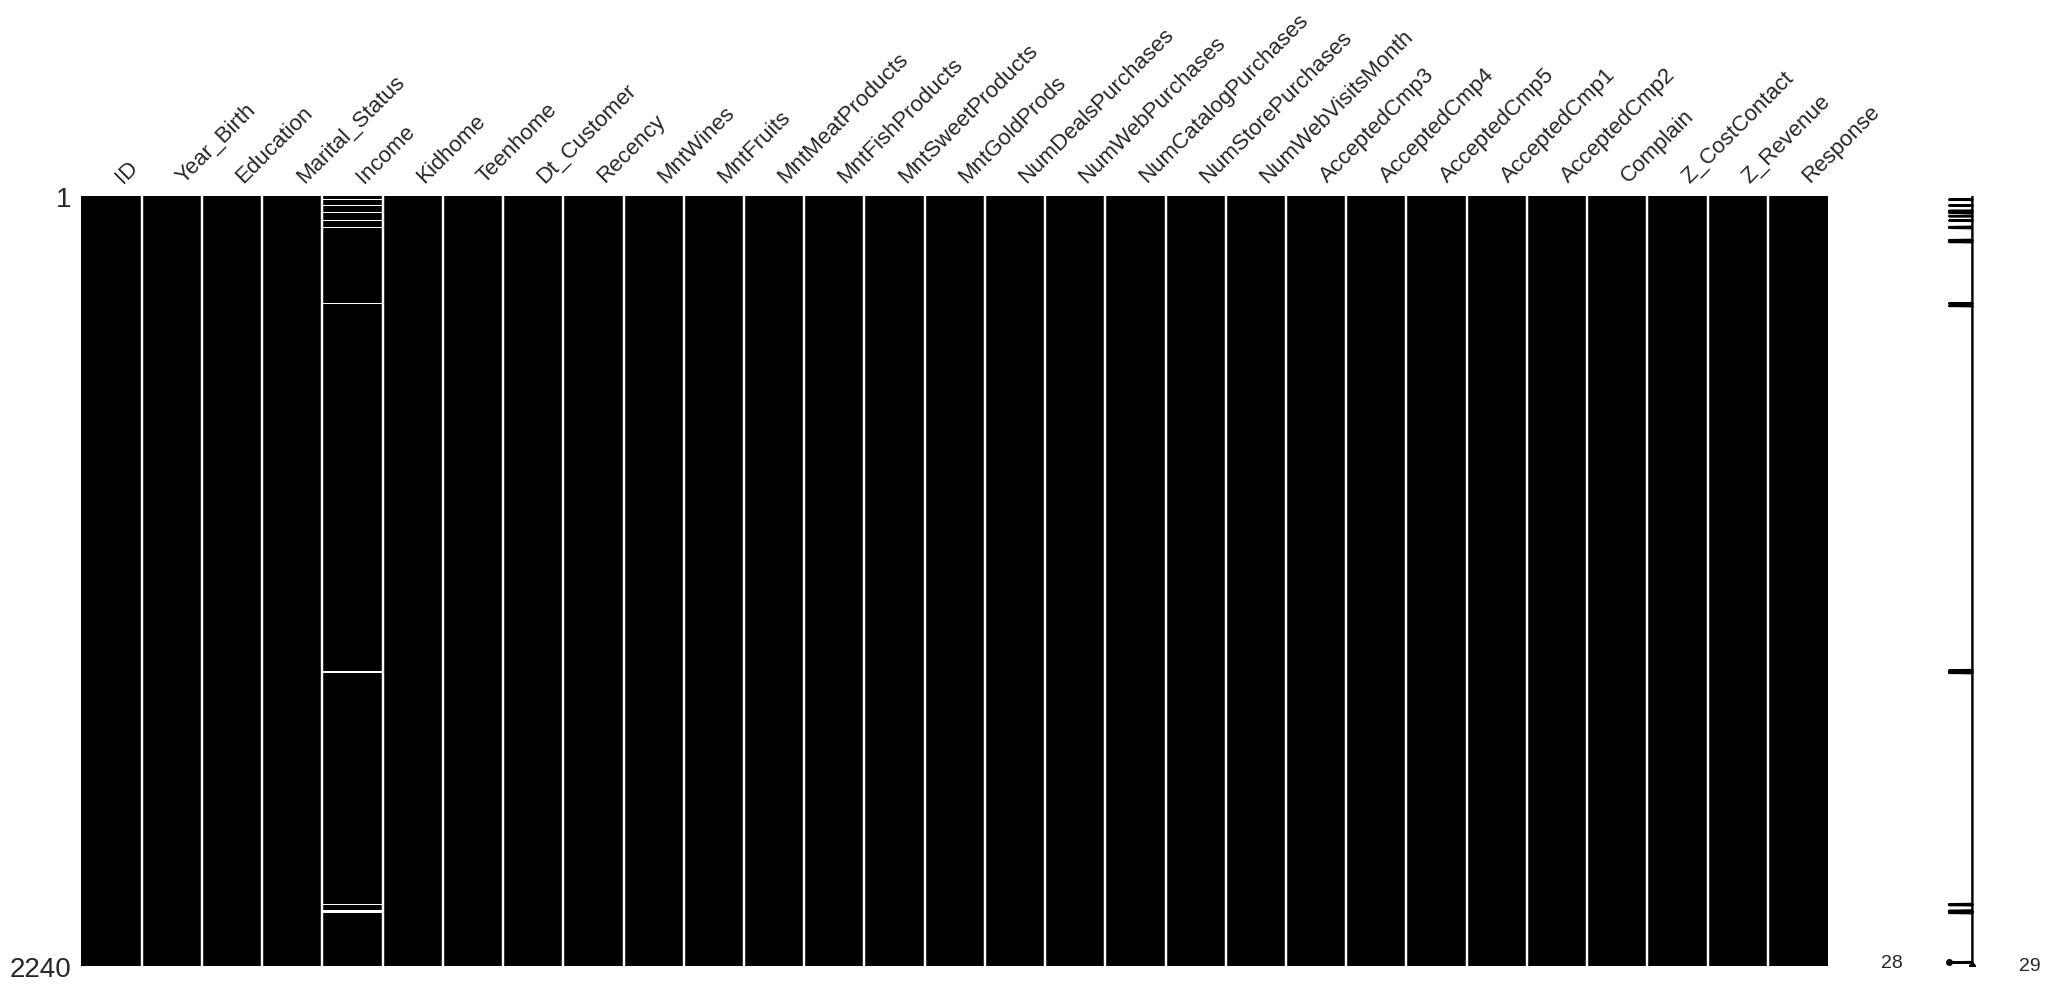

In [155]:
#LETS VISUALISE THE MISSING VALUES PRESENT IN THE DATASET..
import missingno as mn
mn.matrix(df,color = (0,0,0))

In [156]:
#FILL THE MISSING VALUES WITH THE MEDIAN VALUES.. 
df['Income']=df['Income'].fillna(df['Income'].median())
#CHECKING IF ANY NAN IS PRESENT IN COLUMN OR NOT....
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

Detecting the duplicates:-

In [157]:
df[df.duplicated()]
#FINDING THE NUMBER OF UNIQUE VALUES PRESENT IN EACH COLUMN...
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

Note:-In above cell "Z_CostContact" and "Z_Revenue" have same value in all the rows that's why , they are not going to contribute anything in the model building. So we can drop them.

Droping the unwanted feature:-

In [158]:
df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
df.head(5).style.background_gradient(cmap='Greys')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.000000,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.000000,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.000000,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.000000,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.000000,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


Univariate Analysis :-


1.Analysis on Year_Birth Variable.

In [159]:
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "Year_Birth"
print("Unique categories present in the Year_Birth:",df["Year_Birth"].value_counts())

Unique categories present in the Year_Birth: 1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: Year_Birth, dtype: int64


2.Analysis On Education Variable.

In [160]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

Unique categories present in the Education: Post Graduate     2186
Under Graduate      54
Name: Education, dtype: int64




<Figure size 500x500 with 0 Axes>

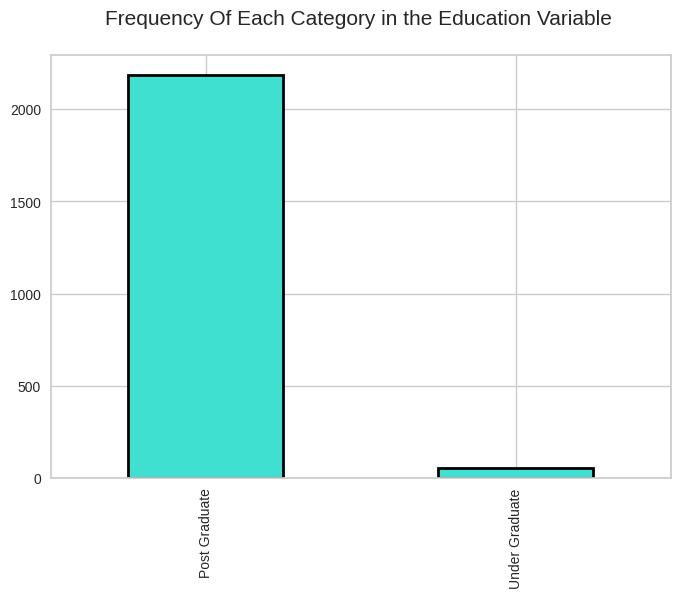

<Figure size 500x500 with 0 Axes>

In [161]:
#CHANGING CATEGORY INTO "UG" AND "PG" ONLY....
df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'Post Graduate')  
df['Education'] = df['Education'].replace(['Basic'], 'Under Graduate')
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "Education"
print("Unique categories present in the Education:",df["Education"].value_counts())
print('\n')

#VISUALIZING THE "Education"
df['Education'].value_counts().plot(kind='bar',color = 'turquoise',edgecolor = "black",linewidth = 2)
plt.title("Frequency Of Each Category in the Education Variable \n",fontsize=15)
plt.figure(figsize=(5,5))

OBSERVATIONS:-

*97.58% of Customers in the dataset are "Post Graduate".

*2.410% of Customers in the dataset are "Under Graduate".

3.Analysis On Marital_Status Variable.

In [162]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

Unique categories present in the Marital_Status: Relationship    1444
Single           796
Name: Marital_Status, dtype: int64




<Figure size 500x500 with 0 Axes>

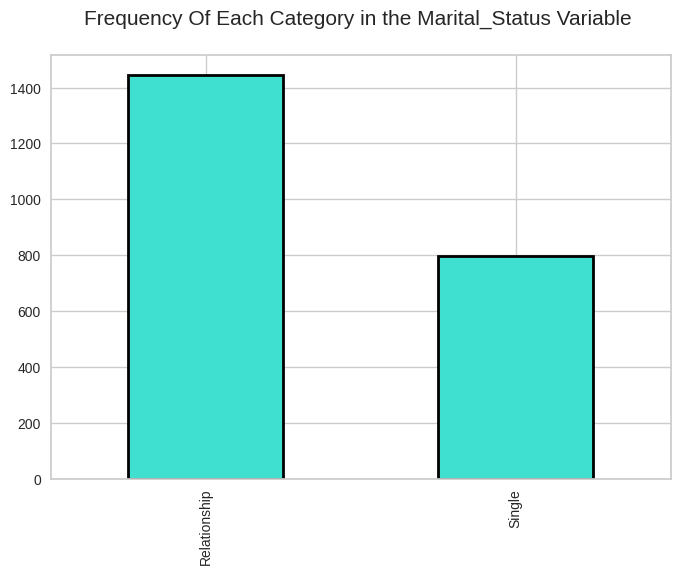

<Figure size 500x500 with 0 Axes>

In [163]:
#REPLACING THE CONFLICT VALUES IN Marital_status..
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'Relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "Marital_Status"
print("Unique categories present in the Marital_Status:",df['Marital_Status'].value_counts())
print("\n")


#VISUALIZING THE "Marital_Status"
df['Marital_Status'].value_counts().plot(kind='bar',color = 'turquoise',edgecolor = "black",linewidth = 2)
plt.title("Frequency Of Each Category in the Marital_Status Variable \n",fontsize=15)
plt.figure(figsize=(5,5))

OBSERVATIONS:-

*64.46% of Customers in the dataset are in "Relationship".

*35.53% of Customers in the dataset are "Single".

4.Analysis On Income Variable.

In [164]:
#Maximum Income
df['Income'].max()

666666.0

In [165]:
#Minimum Income
df['Income'].min()

1730.0

In [166]:
#AverageIncome
df['Income'].mean()

52237.98

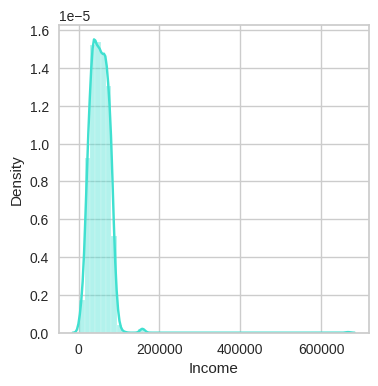

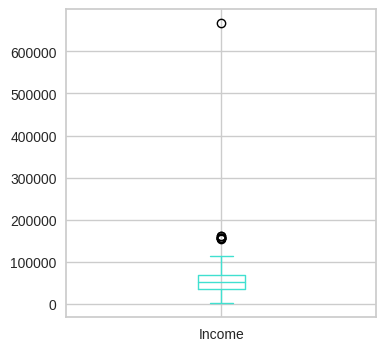

In [167]:
plt.figure(figsize=(4,4))
sns.distplot(df["Income"],color = 'turquoise')
plt.show()
df["Income"].plot.box(figsize=(4,4),color = 'turquoise')
plt.show()

5.Analysis On "Kidhome,Teenhome" Variable.

Unique categories present in the Kids: 1    1128
0     638
2     421
3      53
Name: Kids, dtype: int64




<Figure size 400x400 with 0 Axes>

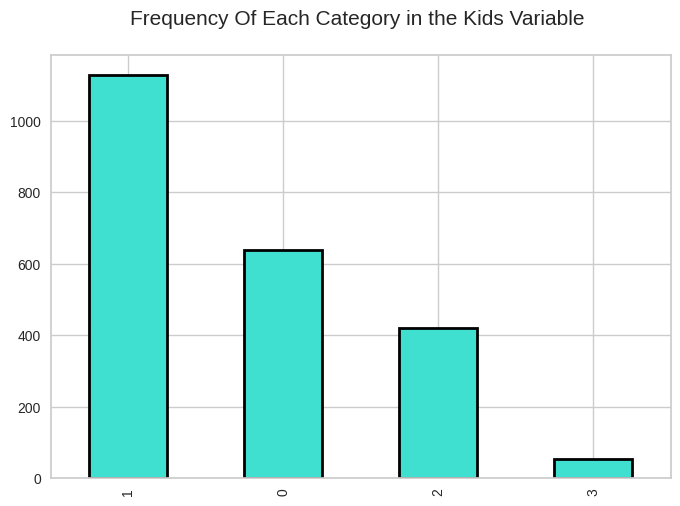

<Figure size 400x400 with 0 Axes>

In [168]:
df['Kidhome'].unique()
df['Teenhome'].unique()

# Combining different dataframe into a single column to reduce the number of dimension
df['Kids'] = df['Kidhome'] + df['Teenhome']
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "Kids"
print("Unique categories present in the Kids:",df['Kids'].value_counts())
print("\n")

#VISUALIZING THE "Kids"
df['Kids'].value_counts().plot(kind='bar',color = 'turquoise',edgecolor = "black",linewidth = 2)
plt.title("Frequency Of Each Category in the Kids Variable \n",fontsize=15)
plt.figure(figsize=(4,4))

OBSERVATIONS :-

*50.35% of Customers in the dataset have 1 kid.

*28.48% of Customers in the dataset have no kids.

*18.79% of Customers in the dataset have 2 kids.

*2.36% of Customers in the dataset have 3 kids.

6.Analysis on "AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5" Variable.

Unique categories present in the TotalAcceptedCmp: 0    1777
1     325
2      83
3      44
4      11
Name: TotalAcceptedCmp, dtype: int64




<Figure size 400x400 with 0 Axes>

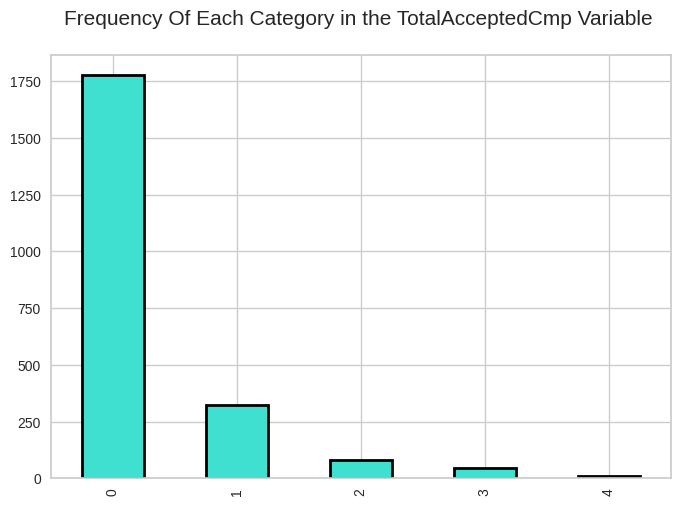

<Figure size 400x400 with 0 Axes>

In [169]:
df['AcceptedCmp1'].unique()
df['AcceptedCmp2'].unique()
df['AcceptedCmp3'].unique()
df['AcceptedCmp4'].unique()
df['AcceptedCmp5'].unique()
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "TotalAcceptedCmp"
print("Unique categories present in the TotalAcceptedCmp:",df['TotalAcceptedCmp'].value_counts())
print("\n")

#VISUALIZING THE "TotalAcceptedCmp"
df['TotalAcceptedCmp'].value_counts().plot(kind='bar',color = 'turquoise',edgecolor = "black",linewidth = 2)
plt.title("Frequency Of Each Category in the TotalAcceptedCmp Variable \n",fontsize=15)
plt.figure(figsize=(4,4))

OBSERVATIONS :-

*79.33% of Customers accepted the offer in the campaign are "0".

*14.50% of Customers accepted the offer in the campaign are "1".

*3.70% of Customers accepted the offer in the campaign are "2".

*1.96% of Customers accepted the offer in the campaign are "3".

*0.49% of Customers accepted the offer in the campaign are "4".

Analysis On "MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds" Variable

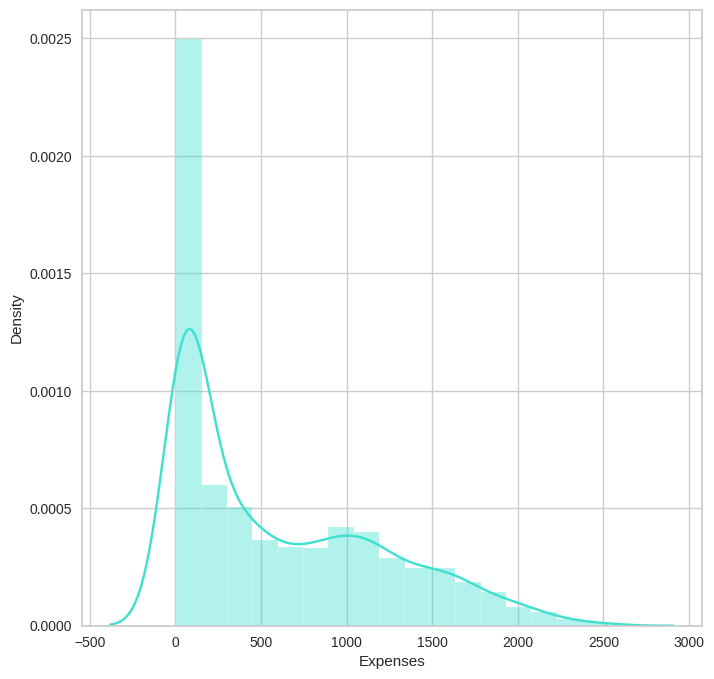

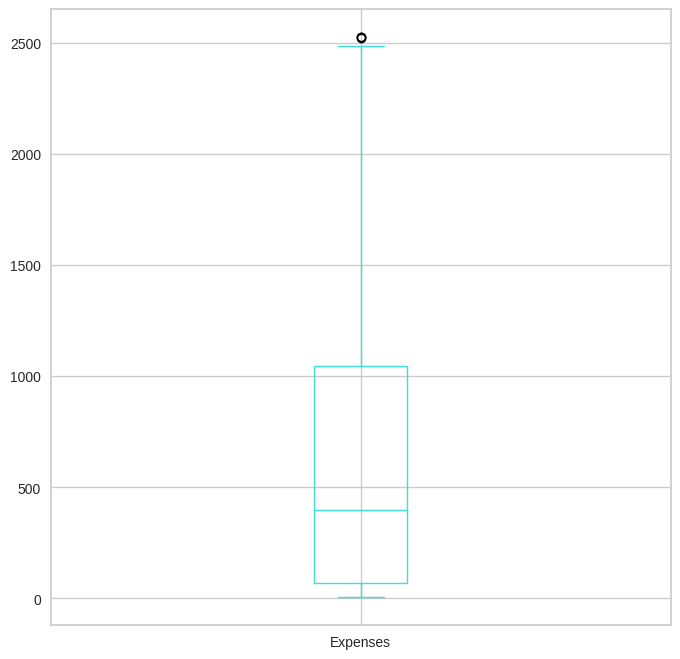

In [170]:
df['MntWines'].unique()
df['MntFruits'].unique()
df['MntMeatProducts'].unique()
df['MntFishProducts'].unique()
df['MntSweetProducts'].unique()
df['MntGoldProds'].unique()

# Combining different dataframe into a single column to reduce the number of dimension
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Expenses'].head(10)

#Minimum Expenses
df['Expenses'].min()

#Maximum Expenses
df['Expenses'].max()

#Average Expenses
df['Expenses'].mean()

plt.figure(figsize=(8,8))
sns.distplot(df["Expenses"],color = 'turquoise')
plt.show()
df["Expenses"].plot.box(figsize=(8,8),color='turquoise')
plt.show()

Analysis on "NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases" Variable.

In [171]:
df['NumWebPurchases'].unique()
df['NumCatalogPurchases'].unique()
df['NumStorePurchases'].unique()
df['NumDealsPurchases'].unique()
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']
df['NumTotalPurchases'].unique()
#Minimum NumTotalPurchases
df['NumTotalPurchases'].min()

0

In [172]:
#Maximum NumTotalPurchases
df['NumTotalPurchases'].max()

44

In [173]:
#Mean NumTotalPurchases
df['NumTotalPurchases'].mean()

14.862053571428572

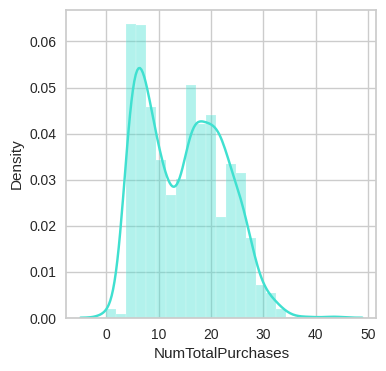

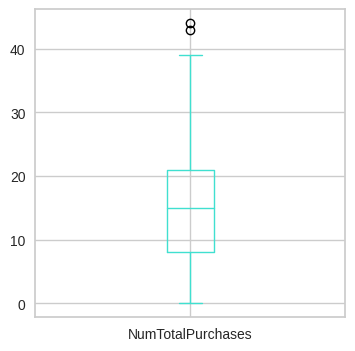

In [174]:
plt.figure(figsize=(4,4))
sns.distplot(df["NumTotalPurchases"],color = 'turquoise')
plt.show()
df["NumTotalPurchases"].plot.box(figsize=(4,4),color = 'turquoise')
plt.show()

In [175]:
# Deleting some column to reduce dimension and complexity of model

col_del = ["ID","AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)
df.head(10).style.background_gradient(cmap='Greys')

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Response,Kids,TotalAcceptedCmp,Expenses,NumTotalPurchases
0,1957,Post Graduate,Single,58138.000000,2012-09-04,58,0,1,0,0,1617,25
1,1954,Post Graduate,Single,46344.000000,2014-03-08,38,0,0,2,0,27,6
2,1965,Post Graduate,Relationship,71613.000000,2013-08-21,26,0,0,0,0,776,21
3,1984,Post Graduate,Relationship,26646.000000,2014-02-10,26,0,0,1,0,53,8
4,1981,Post Graduate,Relationship,58293.000000,2014-01-19,94,0,0,1,0,422,19
5,1967,Post Graduate,Relationship,62513.000000,2013-09-09,16,0,0,1,0,716,22
6,1971,Post Graduate,Single,55635.000000,2012-11-13,34,0,0,1,0,590,21
7,1985,Post Graduate,Relationship,33454.000000,2013-05-08,32,0,0,1,0,169,10
8,1974,Post Graduate,Relationship,30351.000000,2013-06-06,19,0,1,1,0,46,6
9,1950,Post Graduate,Relationship,5648.000000,2014-03-13,68,0,0,2,1,49,2


In [176]:
x = df.columns 
for i in x:
     print(i)

Year_Birth
Education
Marital_Status
Income
Dt_Customer
Recency
Complain
Response
Kids
TotalAcceptedCmp
Expenses
NumTotalPurchases


In [177]:
#NUMBER OF DAYS A CUSTOMER WAS ENGAGED WITH COMPANY...... 
#CHANGING "Dt_customer" into timestamp format......

df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer)
df['First_day'] = '01-01-2015'
df['First_day'] = pd.to_datetime(df.First_day)
df['Day_engaged'] = (df['First_day'] - df['Dt_Customer']).dt.days

Unique categories present in the Age: 10    1189
9      557
11     494
Name: Age, dtype: int64




<Figure size 400x400 with 0 Axes>

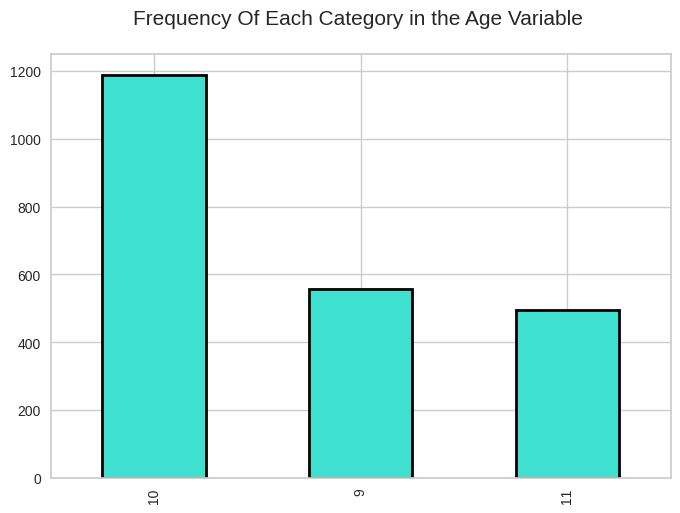

<Figure size 400x400 with 0 Axes>

In [178]:
#ADDING A COLUMN "Age" IN THE DATAFRAME....
df['Age'] = (pd.Timestamp('now').year) - (pd.to_datetime(df['Dt_Customer']).dt.year)

#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "Age"
print("Unique categories present in the Age:",df['Age'].value_counts())
print("\n")


#VISUALIZING THE "Age"
df['Age'].value_counts().plot(kind='bar',color = 'turquoise',edgecolor = "black",linewidth = 2)
plt.title("Frequency Of Each Category in the Age Variable \n",fontsize=15)
plt.figure(figsize=(4,4))

OBSERVATIONS:-

*53.08% are 8 years old customers.

*24.86% are 7 years old customers.

*22.05% are 9 years old customers.

In [179]:
df.head(5).style.background_gradient(cmap='Greys')

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Response,Kids,TotalAcceptedCmp,Expenses,NumTotalPurchases,First_day,Day_engaged,Age
0,1957,Post Graduate,Single,58138.000000,2012-09-04 00:00:00,58,0,1,0,0,1617,25,2015-01-01 00:00:00,849,11
1,1954,Post Graduate,Single,46344.000000,2014-03-08 00:00:00,38,0,0,2,0,27,6,2015-01-01 00:00:00,299,9
2,1965,Post Graduate,Relationship,71613.000000,2013-08-21 00:00:00,26,0,0,0,0,776,21,2015-01-01 00:00:00,498,10
3,1984,Post Graduate,Relationship,26646.000000,2014-02-10 00:00:00,26,0,0,1,0,53,8,2015-01-01 00:00:00,325,9
4,1981,Post Graduate,Relationship,58293.000000,2014-01-19 00:00:00,94,0,0,1,0,422,19,2015-01-01 00:00:00,347,9


In [180]:
df=df.drop(columns=["Dt_Customer", "First_day", "Year_Birth", "Dt_Customer", "Recency", "Complain","Response"],axis=1)
df.head(5).style.background_gradient(cmap='Greys')

,Education,Marital_Status,Income,Kids,TotalAcceptedCmp,Expenses,NumTotalPurchases,Day_engaged,Age
0,Post Graduate,Single,58138.000000,0,0,1617,25,849,11
1,Post Graduate,Single,46344.000000,2,0,27,6,299,9
2,Post Graduate,Relationship,71613.000000,0,0,776,21,498,10
3,Post Graduate,Relationship,26646.000000,1,0,53,8,325,9
4,Post Graduate,Relationship,58293.000000,1,0,422,19,347,9


Bivariate Analysis :-

1.Education vs Expenses

In [181]:
pd.crosstab(df['Education'],df['Expenses'],margins=True).style.background_gradient(cmap='Greys')

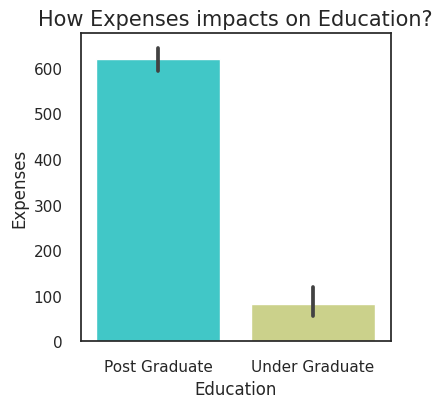

In [182]:
sns.set_theme(style="white")
plt.figure(figsize=(4,4))
plt.title("How Expenses impacts on Education?",fontsize=15)
ax = sns.barplot(x="Education", y="Expenses", data=df,palette="rainbow")

2.Marital status vs Expenses

In [183]:
pd.crosstab(df['Marital_Status'],df['Expenses'],margins=True).style.background_gradient(cmap='Greys')

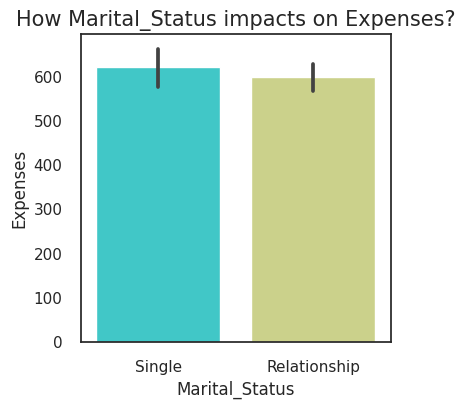

In [184]:
sns.set_theme(style="white")
plt.figure(figsize=(4,4))
plt.title("How Marital_Status impacts on Expenses?",fontsize=15)
ax = sns.barplot(x="Marital_Status", y="Expenses", data=df,palette="rainbow")

3.Kids vs Expenses

In [185]:
pd.crosstab(df['Kids'],df['Expenses'],margins=True).style.background_gradient(cmap='Greys')

Expenses,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,106,107,108,109,112,114,115,116,117,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,137,138,139,140,141,143,144,145,146,147,148,149,151,152,153,155,156,157,158,159,160,161,162,163,165,167,169,170,171,172,173,174,175,176,177,178,180,182,183,184,185,186,187,188,189,191,192,193,194,195,198,199,201,203,205,207,209,210,211,213,215,216,217,218,219,221,222,223,224,225,227,231,232,233,235,236,237,240,241,242,244,246,251,252,253,254,255,257,258,259,260,263,264,265,266,267,268,269,270,271,272,273,274,275,277,278,279,282,283,284,285,289,290,292,293,294,296,297,299,300,301,302,304,305,306,309,310,311,312,313,315,316,317,318,319,320,322,324,325,326,330,331,332,334,335,339,341,343,347,348,350,351,353,354,357,358,359,361,362,363,365,367,368,369,371,372,373,377,380,382,384,385,388,390,392,393,395,396,397,398,400,401,404,405,406,407,409,410,411,413,414,415,416,417,418,421,422,424,425,426,428,429,431,433,434,436,437,438,441,442,443,444,446,447,448,449,450,454,455,458,459,460,461,463,467,468,470,473,475,480,482,484,485,486,488,490,491,492,493,494,495,496,497,499,500,502,504,506,507,515,518,519,521,523,525,526,527,528,529,530,534,535,541,542,544,545,546,551,556,557,559,561,562,563,564,568,570,573,574,575,576,577,578,581,586,587,590,594,595,596,597,599,601,602,603,605,606,608,610,611,612,614,615,622,629,630,632,633,634,635,636,637,638,639,641,642,653,654,655,656,660,661,662,663,664,670,677,679,680,682,683,684,685,688,689,690,691,692,693,694,702,704,708,710,711,714,715,716,721,724,725,726,727,728,729,730,731,732,733,734,735,736,745,746,747,749,751,756,757,758,761,763,764,766,767,769,770,772,775,776,777,778,779,787,789,792,793,794,795,797,798,800,801,802,805,809,811,813,815,816,817,818,819,820,823,825,832,833,834,835,836,839,841,843,844,845,849,850,854,858,859,860,861,863,868,869,871,873,874,877,879,882,884,889,890,892,893,894,895,899,900,901,902,903,904,906,907,908,909,910,913,914,915,916,917,925,926,928,929,930,932,936,937,938,939,940,943,945,946,948,953,957,960,961,963,964,965,966,967,968,969,971,972,973,974,976,978,981,982,984,985,988,989,990,992,993,995,999,1001,1003,1004,1005,1006,1008,1009,1012,1013,1016,1019,1020,1021,1024,1026,1027,1028,1029,1033,1034,1038,1039,1040,1042,1043,1044,1045,1047,1048,1049,1052,1053,1060,1062,1064,1065,1066,1067,1068,1071,1072,1073,1076,1078,1079,1080,1082,1084,1085,1086,1088,1089,1091,1092,1093,1095,1097,1099,1101,1102,1103,1104,1105,1106,1109,1112,1113,1115,1117,1120,1121,1123,1125,1127,1128,1130,1131,1134,1135,1138,1139,1141,1143,1146,1147,1148,1149,1150,1151,1152,1155,1156,1157,1158,1159,1161,1165,1167,1168,1169,1171,1173,1174,1175,1178,1179,1180,1182,1185,1187,1188,1189,1190,1191,1192,1193,1194,1196,1198,1199,1208,1210,1211,1213,1215,1216,1217,1220,1226,1228,1229,1230,1231,1232,1234,1237,1240,1241,1242,1244,1245,1250,1253,1258,1260,1263,1264,1269,1270,1272,1274,1277,1280,1281,1282,1283,1286,1288,1289,1291,1293,1295,1298,1305,1307,1313,1314,1315,1318,1319,1323,1327,1331,1334,1335,1336,1338,1341,1345,1346,1348,1363,1364,1365,1366,1367,1370,1371,1374,1375,1376,1377,1378,1379,1380,1381,1382,1383,1385,1388,1390,1392,1395,1396,1400,1401,1410,1415,1416,1423,1424,1427,1428,1429,1435,1438,1440,1442,1443,1445,1449,1453,1455,1456,1459,1461,1464,1471,1472,1474,1477,1478,1479,1482,1483,1485,1490,1493,1495,1497,1501,1502,1504,1507,1508,1511,1512,1513,1515,1518,1525,1526,1528,1529,1531,1533,1536,1538,1540,1544,1555,1562,1564,1565,1566,1572,1573,1574,1575,1576,1580,1581,1586,1587,1588,1596,1597,1598,1600,1603,1608,1611,1612,1615,1616,1617,1621,1623,1627,1631,1633,1635,1638,1643,1644,1650,1651,1655,1658,1662,1665,1670,1672,1674,1676,1677,1678,1679,1680,1682,1685,1686,1688,1690,1691,1693,1695,1701,1702,1706,1

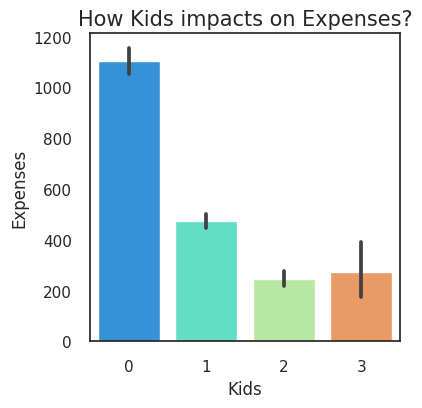

In [186]:
sns.set_theme(style="white")
plt.figure(figsize=(4,4))
plt.title("How Kids impacts on Expenses?",fontsize=15)
ax = sns.barplot(x="Kids", y="Expenses", data=df,palette="rainbow")

Age vs Expenses

In [187]:
pd.crosstab(df['Age'],df['Expenses'],margins=True).style.background_gradient(cmap='Greys')

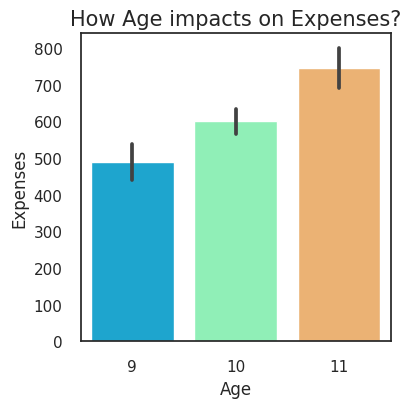

In [188]:
sns.set_theme(style="white")
plt.figure(figsize=(4,4))
plt.title("How Age impacts on Expenses?",fontsize=15)
ax = sns.barplot(x="Age", y="Expenses", data=df,palette="rainbow")

In [189]:
df.head(5).style.background_gradient(cmap='Greys')

,Education,Marital_Status,Income,Kids,TotalAcceptedCmp,Expenses,NumTotalPurchases,Day_engaged,Age
0,Post Graduate,Single,58138.000000,0,0,1617,25,849,11
1,Post Graduate,Single,46344.000000,2,0,27,6,299,9
2,Post Graduate,Relationship,71613.000000,0,0,776,21,498,10
3,Post Graduate,Relationship,26646.000000,1,0,53,8,325,9
4,Post Graduate,Relationship,58293.000000,1,0,422,19,347,9


In [190]:
df.describe(include = 'all').style.background_gradient(cmap='Greys')

,Education,Marital_Status,Income,Kids,TotalAcceptedCmp,Expenses,NumTotalPurchases,Day_engaged,Age
count,2240,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
unique,2,2,nan,nan,nan,nan,nan,nan,nan
top,Post Graduate,Relationship,nan,nan,nan,nan,nan,nan,nan
freq,2186,1444,nan,nan,nan,nan,nan,nan,nan
mean,nan,nan,52237.980469,0.950446,0.297768,605.798214,14.862054,539.582143,9.971875
std,nan,nan,25037.955078,0.751803,0.678381,602.249288,7.677173,202.122512,0.684554
min,nan,nan,1730.000000,0.000000,0.000000,5.000000,0.000000,186.000000,9.000000
25%,nan,nan,35538.750000,0.000000,0.000000,68.750000,8.000000,366.750000,10.000000
50%,nan,nan,51381.500000,1.000000,0.000000,396.000000,15.000000,541.500000,10.000000
75%,nan,nan,68289.750000,1.000000,0.000000,1045.500000,21.000000,715.000000,10.000000


Finding the correlation:-

<Axes: >

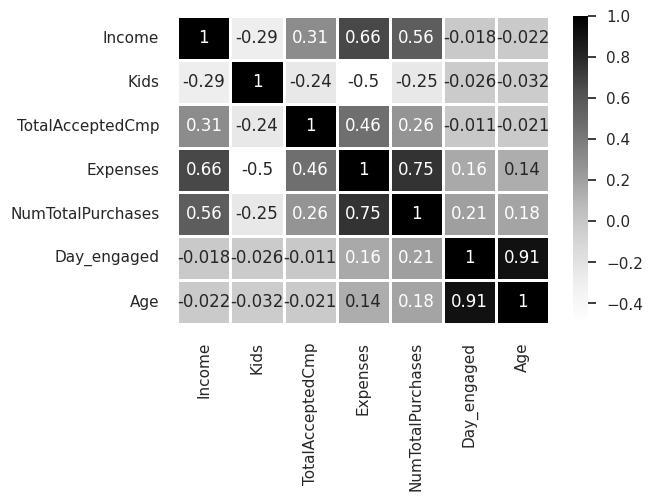

In [191]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True,cmap = 'Greys',linewidths=1)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2240 non-null   object 
 1   Marital_Status     2240 non-null   object 
 2   Income             2240 non-null   float32
 3   Kids               2240 non-null   int8   
 4   TotalAcceptedCmp   2240 non-null   int8   
 5   Expenses           2240 non-null   int16  
 6   NumTotalPurchases  2240 non-null   int8   
 7   Day_engaged        2240 non-null   int64  
 8   Age                2240 non-null   int64  
dtypes: float32(1), int16(1), int64(2), int8(3), object(2)
memory usage: 89.8+ KB


In [193]:
cont_features = df.iloc[:, 2:9] 
print(type(cont_features))
print('\n')
print(cont_features.head())

<class 'pandas.core.frame.DataFrame'>


    Income  Kids  TotalAcceptedCmp  Expenses  NumTotalPurchases  Day_engaged  \
0  58138.0     0                 0      1617                 25          849   
1  46344.0     2                 0        27                  6          299   
2  71613.0     0                 0       776                 21          498   
3  26646.0     1                 0        53                  8          325   
4  58293.0     1                 0       422                 19          347   

   Age  
0   11  
1    9  
2   10  
3    9  
4    9  


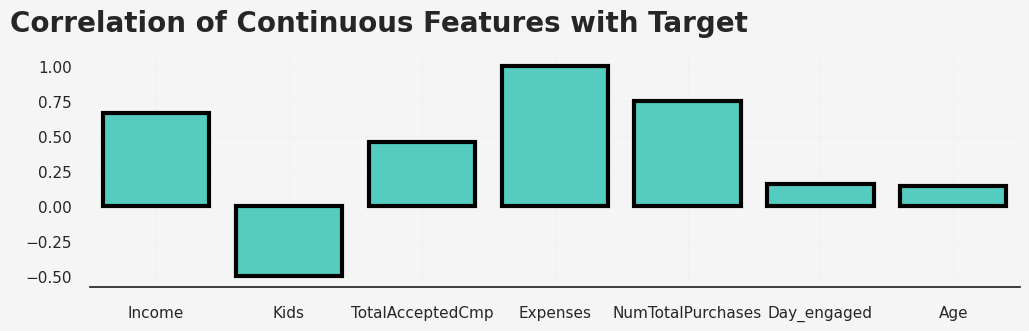

In [194]:
import matplotlib
background_color = "#f6f5f5"

fig = plt.figure(figsize=(12,3), facecolor=background_color)
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])
colors = ["#2f5586", "#f6f5f5","#2f5586"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

ax0.set_facecolor(background_color)
ax0.text(-1.1, 1.25, 'Correlation of Continuous Features with Target', fontsize=20, fontweight='bold')

chart_df = pd.DataFrame(cont_features.corrwith(df['Expenses']))
chart_df.columns = ['corr']
sns.barplot(x=chart_df.index, y=chart_df['corr'], ax=ax0, color='turquoise', zorder=3, edgecolor='black', linewidth=3)
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.set_ylabel('')

for s in ["top","right", 'left']:
    ax0.spines[s].set_visible(False)

plt.show()

OBSERVATIONS :-

*Highest correlation between features is 0.7.

*There is no continuous features that has correlation with Expenses below 0.7 and above 0.15.

*Day_engaged and Age has the lowest correlation with expenses,almost reaching 0.14 while NumTotalPurchases has the highest correlation with the expenses.

### **Multivariative Analysis**

# **Elbow Method - Now Lets Find The Number Of Clusters :-**

In [195]:
cate = []
for i in df.columns:
    if (df[i].dtypes == "object"):
        cate.append(i)
print(" Object are:",cate)

Int = []
for i in df.columns:
    if (df[i].dtypes == "int64"):
        Int.append(i)
print(" Integers are:",Int)

Float = []
for i in df.columns:
    if (df[i].dtypes == "float64"):
        Float.append(i)

print("Float are:",Float)

from sklearn.preprocessing import LabelEncoder
lbl_encode = LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

df1 = df.copy()

from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(df1.values)
sf_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)
sf_df.head().style.background_gradient(cmap='Greys')

 Object are: ['Education', 'Marital_Status']
 Integers are: ['Day_engaged', 'Age']
Float are: []


,Education,Marital_Status,Income,Kids,TotalAcceptedCmp,Expenses,NumTotalPurchases,Day_engaged,Age
0,-0.157171,1.346874,0.235696,-1.264505,-0.439037,1.679417,1.320826,1.531185,1.502225
1,-0.157171,1.346874,-0.235454,1.396361,-0.439037,-0.961275,-1.154596,-1.190545,-1.420036
2,-0.157171,-0.742460,0.773999,-1.264505,-0.439037,0.282673,0.799685,-0.205773,0.041094
3,-0.157171,-0.742460,-1.022355,0.065928,-0.439037,-0.918094,-0.894025,-1.061881,-1.420036
4,-0.157171,-0.742460,0.241888,0.065928,-0.439037,-0.305254,0.539114,-0.953012,-1.420036


In [196]:
X = sf_df.iloc[:, [2, 5]].values
print(X)

[[ 0.23569584  1.67941681]
 [-0.23545419 -0.96127545]
 [ 0.77399892  0.28267329]
 ...
 [ 0.18947568  1.05495122]
 [ 0.67940139  0.39394775]
 [ 0.02520835 -0.7204576 ]]


Analysing the Sensible Customer ( Having low income and low expenses) and Careless Customers (Having low income and high expenses) with Elbow and K-means Clustering by targeting the income and expenses column 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


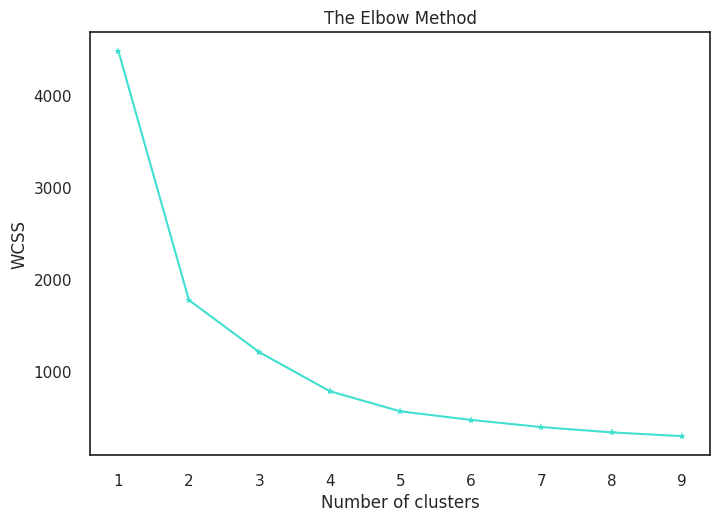

In [197]:
#install yellowbrick to vizualize the Elbow curve
!pip install yellowbrick  

from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 50)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss,color = "turquoise",marker = '*')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The above graph selects an Elbow point at K=2, but K=3 also looks like a plausible elbow point. So, it is not clear what should be the Elbow point. Let’s validate the value of K using the Silhouette plot 

In [198]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

0.5952079091294542
0.597436916995426
0.5054086308480474


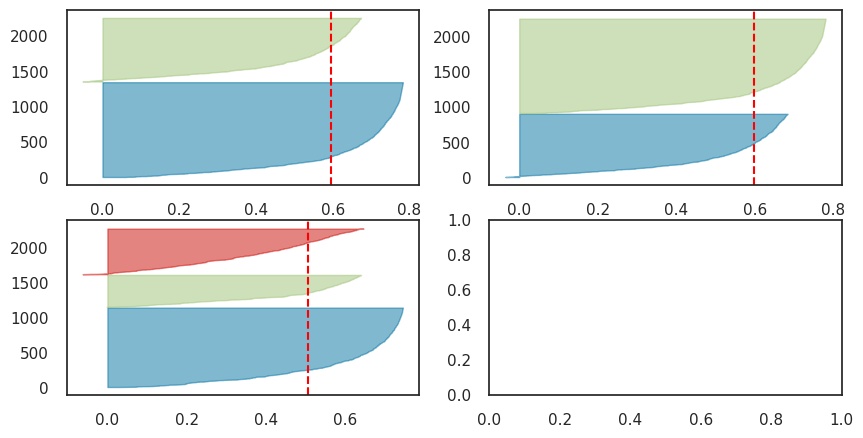

In [199]:
fig, ax = plt.subplots(2, 2, figsize=(10,5))
for i in [2, 3, 4]:
    #Create KMeans instances for different number of clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=50)
    q, mod = divmod(i, 2)
    
    #Create SilhouetteVisualizer instance with KMeans instance 
    #Fit the visualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X) 
    labels = kmeans.predict(X)
    print(silhouette_score(X, labels))

The Silhouette score is maximum(0.56) for K = 2 but the following conditions should also be checked to pick the right ‘K’ using the Silhouette plots:

* For a particular K, all the clusters should have a Silhouette score more than the average score of the dataset (represented by a red dotted line). The x-axis represents the Silhouette score. The clusters with K = 3 gets eliminated as it doesn’t follow this condition.

So, the Silhouette plot approach gives us K = 2 as the optimal value.

# **K - Means Clustering :-**

In [200]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters =2 , init = 'k-means++', random_state = 54)
y_kmeans = kmeans.fit_predict(X)

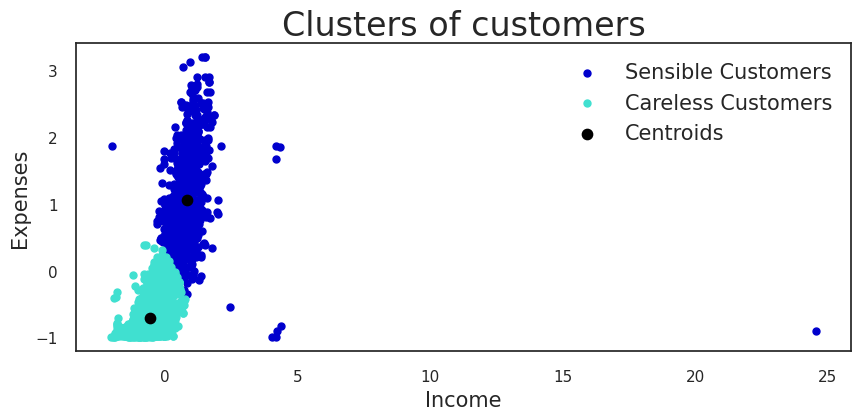

In [201]:
# Visualising the clusters
plt.figure(figsize= (10,4))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 25, c = 'mediumblue', label = 'Sensible Customers')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 25, c = 'turquoise', label = 'Careless Customers')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 55, c = 'black', label = 'Centroids')
plt.title('Clusters of customers',fontsize = 24)
plt.xlabel('Income',fontsize = 15)
plt.ylabel('Expenses',fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

Observations :

*Customer who has Low income and Low Expenses are Sensible customers.

*Customer who has Low income and High Expenses are Careless customers.